In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# !pip install seaborn
import seaborn as sns

In [2]:
main_df = pd.read_csv('/opt/ml/input/data/train/train_ratings.csv')
title_df = pd.read_csv('/opt/ml/input/data/train/titles.tsv', sep='\t')
year_df = pd.read_csv('/opt/ml/input/data/train/years.tsv', sep='\t')
director_df = pd.read_csv('/opt/ml/input/data/train/directors.tsv', sep='\t')
genre_name_df = pd.read_csv('/opt/ml/input/data/train/genres.tsv', sep='\t')
writer_df = pd.read_csv('/opt/ml/input/data/train/writers.tsv', sep='\t')

In [3]:
print('총 사용자 수 :',main_df['user'].nunique())
print('총 영화 수 :',main_df['item'].nunique())

총 사용자 수 : 31360
총 영화 수 : 6807


genre, writer, director는 한 영화에 여러개가 있을 경우가 있다

In [4]:
print('genre_name')
print(len(genre_name_df))
print(genre_name_df['item'].nunique())
print()
print('writer')
print(len(writer_df))
print(writer_df['item'].nunique())
print()
print('director')
print(len(director_df))
print(director_df['item'].nunique())
print()
print('year')
print(len(year_df))
print(year_df['item'].nunique())
print()
print('title')
print(len(title_df))
print(title_df['item'].nunique())

genre_name
15933
6807

writer
11306
5648

director
5905
5503

year
6799
6799

title
6807
6807


In [5]:
# genres_df 생성
genres_df = pd.read_csv("/opt/ml/input/data/train/genres.tsv", sep="\t")
array, index = pd.factorize(genres_df["genre"])
genres_df["genre"] = array
genres_df

,item,genre
0,318,0
1,318,1
2,2571,2
3,2571,3
4,2571,4
...,...,...
15928,109850,1
15929,8605,2
15930,8605,5
15931,3689,5


In [6]:
ref_genre_dict = {}
for i, j in list(zip(genres_df['item'], genres_df['genre'])):
    try:
        ref_genre_dict[i].append(j)
    except KeyError:
        ref_genre_dict[i] = [j]
ref_genre_dict

{318: [0, 1],
 2571: [2, 3, 4],
 2959: [2, 0, 1, 4],
 296: [5, 0, 1, 4],
 356: [5, 1, 6, 7],
 4993: [8, 9],
 7153: [2, 8, 1, 9],
 5952: [8, 9],
 593: [0, 10, 4],
 2858: [5, 1],
 4226: [11, 4],
 58559: [2, 0, 1],
 260: [2, 8, 3],
 50: [0, 11, 4],
 858: [0, 1],
 1198: [2, 8],
 1196: [2, 8, 3],
 527: [1, 7],
 2762: [1, 10, 11],
 7361: [1, 6, 3],
 47: [11, 4],
 4306: [8, 12, 13, 5, 9, 6],
 33794: [2, 0],
 4973: [5, 6],
 1270: [8, 5, 3],
 3578: [2, 8, 1],
 1210: [2, 8, 3],
 6539: [2, 8, 5, 9],
 110: [2, 1, 7],
 2329: [0, 1],
 1: [8, 12, 13, 5, 9],
 6377: [8, 12, 13, 5],
 2028: [2, 1, 7],
 1136: [8, 5, 9],
 8961: [2, 8, 12, 13, 5],
 6874: [2, 0, 4],
 480: [2, 8, 3, 4],
 589: [2, 3],
 32: [11, 3, 4],
 1193: [1],
 4963: [0, 4],
 4886: [8, 12, 13, 5, 9],
 48516: [0, 1, 4],
 4995: [1, 6],
 1089: [0, 11, 4],
 1291: [2, 8],
 1704: [1, 6],
 7438: [2, 1, 4],
 79132: [2, 0, 1, 11, 3, 4],
 4878: [1, 11, 3, 4],
 32587: [2, 0, 14, 11, 4],
 608: [5, 0, 1, 4],
 1197: [2, 8, 5, 9, 6],
 1221: [0, 1],
 44191

# EDA 시작

In [7]:
# 장르의 종류
# 숫자로 표현 했을때도 index 순이다

g_name_to_idx = {}
g_idx_to_name = {}
for i, j in enumerate(genre_name_df['genre'].unique()):
    g_name_to_idx[j] = i
    g_idx_to_name[i] = j

print(g_idx_to_name)
print()
print(g_name_to_idx)

genre_name_df['genre'].unique()

{0: 'Crime', 1: 'Drama', 2: 'Action', 3: 'Sci-Fi', 4: 'Thriller', 5: 'Comedy', 6: 'Romance', 7: 'War', 8: 'Adventure', 9: 'Fantasy', 10: 'Horror', 11: 'Mystery', 12: 'Animation', 13: 'Children', 14: 'Film-Noir', 15: 'Musical', 16: 'Western', 17: 'Documentary'}

{'Crime': 0, 'Drama': 1, 'Action': 2, 'Sci-Fi': 3, 'Thriller': 4, 'Comedy': 5, 'Romance': 6, 'War': 7, 'Adventure': 8, 'Fantasy': 9, 'Horror': 10, 'Mystery': 11, 'Animation': 12, 'Children': 13, 'Film-Noir': 14, 'Musical': 15, 'Western': 16, 'Documentary': 17}


array(['Crime', 'Drama', 'Action', 'Sci-Fi', 'Thriller', 'Comedy',
       'Romance', 'War', 'Adventure', 'Fantasy', 'Horror', 'Mystery',
       'Animation', 'Children', 'Film-Noir', 'Musical', 'Western',
       'Documentary'], dtype=object)

* 생각해본 점  
장르를 카테고리로 볼 수도 있으나   
Action-War의 거리가 Action-Documentary의 거리보다 가깝다고 생각한다.  
Crime과 Film-Noir는 거의 같은 장르이다  
따라서 이를 반영한 임베딩을 해보면 어떨까?  
(한 영화에 여러 장르가 포함될 수 있음)

In [18]:
print('총 영화 수',main_df['item'].nunique())
print()
print('작가가 있는 영화수',writer_df['item'].nunique())
print('결측치',main_df['item'].nunique() - writer_df['item'].nunique())
print()
print('감독이 있는 영화수',director_df['item'].nunique())
print('결측치',main_df['item'].nunique() - director_df['item'].nunique())
print()
print('장르 있는 영화수',len(list(ref_genre_dict.keys())))
print('결측치',main_df['item'].nunique() - len(list(ref_genre_dict.keys())))
print()
print('연도이 있는 영화수',year_df['item'].nunique())
print('결측치',main_df['item'].nunique() - year_df['item'].nunique())
print()
print('제목이 있는 영화수',title_df['item'].nunique())
print('결측치',main_df['item'].nunique() - title_df['item'].nunique())

총 영화 수 6807

작가가 있는 영화수 5648
결측치 1159

감독이 있는 영화수 5503
결측치 1304

장르 있는 영화수 6807
결측치 0

연도이 있는 영화수 6799
결측치 8

제목이 있는 영화수 6807
결측치 0


영화를 기준으로 작가와 감독의 결측치가 1/5 수준

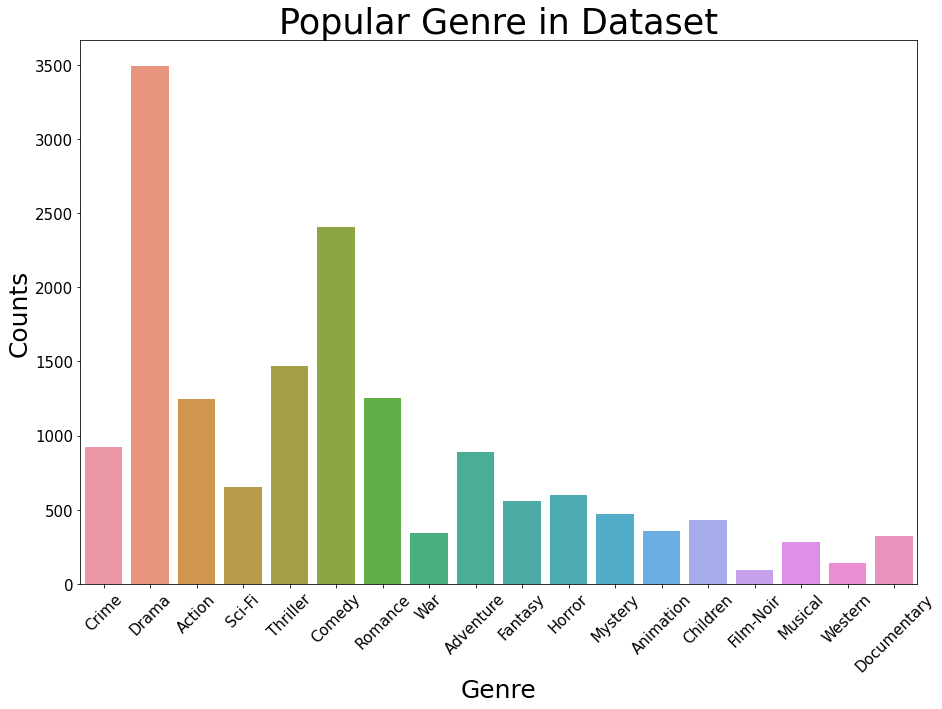

In [45]:
genre_dict = {}
for i in genre_name_df['genre'].unique():
    genre_dict[i] = 0
    
for i in ref_genre_dict.values():
    for j in i:
        genre_dict[g_idx_to_name[j]] += 1

plt.rcParams['figure.figsize'] = [15,10]
sns.barplot(x = list(genre_dict.keys()), y = list(genre_dict.values()))
plt.title('Popular Genre in Dataset', fontsize=35)
plt.ylabel('Counts',fontsize=25)
plt.xlabel('Genre',fontsize=25)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()

Drama와 Comedy가 가장 많다

In [10]:
user_how_many_item_df = main_df.groupby('user').count().drop('time',axis=1)
display(user_how_many_item_df.describe())

,item
count,31360.000000
mean,164.364509
std,150.009107
min,16.000000
25%,71.000000
50%,114.000000
75%,200.000000
max,2912.000000


영화를 가장 많이 본 사람 : 2912  
영화를 가장 적게 본 사람 : 16  
유저가 본 영화 개수의 평균 : 164.36

많이 본 사람들이 평균에 비해 많이 보는 경향이있다(평균이 중앙값보다 오른쪽(큰수)에 위치하기 때문)

In [30]:
ref_df = pd.merge(main_df,year_df,on='item',how='left')
ref_df = pd.merge(ref_df,title_df,on='item',how='left')
ref_df

,user,item,time,year,title
0,11,4643,1230782529,2001.0,Planet of the Apes (2001)
1,11,170,1230782534,1995.0,Hackers (1995)
2,11,531,1230782539,1993.0,"Secret Garden, The (1993)"
3,11,616,1230782542,1970.0,"Aristocats, The (1970)"
4,11,2140,1230782563,1982.0,"Dark Crystal, The (1982)"
...,...,...,...,...,...
5154466,138493,44022,1260209449,2006.0,Ice Age 2: The Meltdown (2006)
5154467,138493,4958,1260209482,2001.0,Behind Enemy Lines (2001)
5154468,138493,68319,1260209720,2009.0,X-Men Origins: Wolverine (2009)
5154469,138493,40819,1260209726,2005.0,Walk the Line (2005)


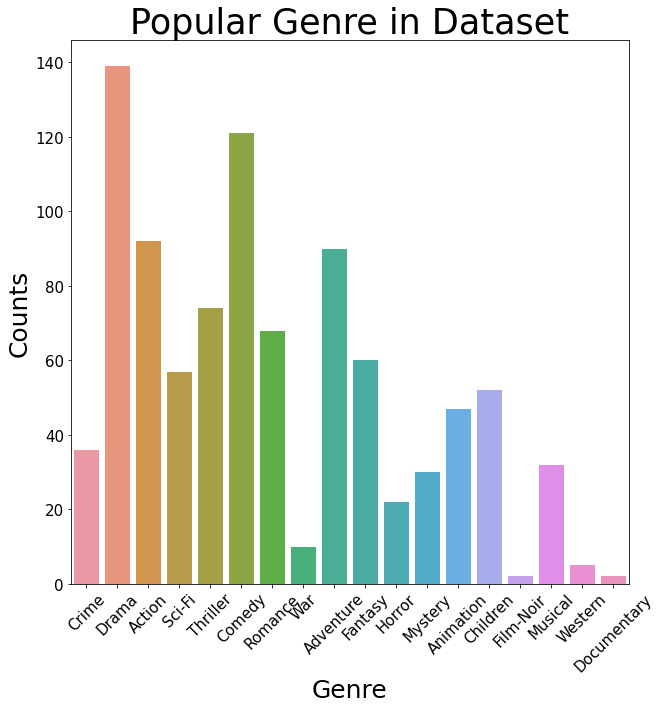

In [48]:
user_id = 138493

genre_dict = {}
for i in genre_name_df['genre'].unique():
    genre_dict[i] = 0

for i in main_df.loc[main_df['user'] == user_id]['item']:
    for j in ref_genre_dict[i]:
        genre_dict[g_idx_to_name[j]] += 1
    

plt.rcParams['figure.figsize'] = [10,10]
sns.barplot(x = list(genre_dict.keys()), y = list(genre_dict.values()))
plt.title('Popular Genre in Dataset', fontsize=35)
plt.ylabel('Counts',fontsize=25)
plt.xlabel('Genre',fontsize=25)
plt.xticks(fontsize=15,rotation = 45)
plt.yticks(fontsize=15)
plt.show()

개인에 한에서 좋아하는 장르는 뚜렷한 양상을 보인다

In [51]:
director_df

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
...,...,...
5900,84273,nm2879822
5901,58376,nm2879822
5902,65225,nm2879822
5903,2394,nm9054338


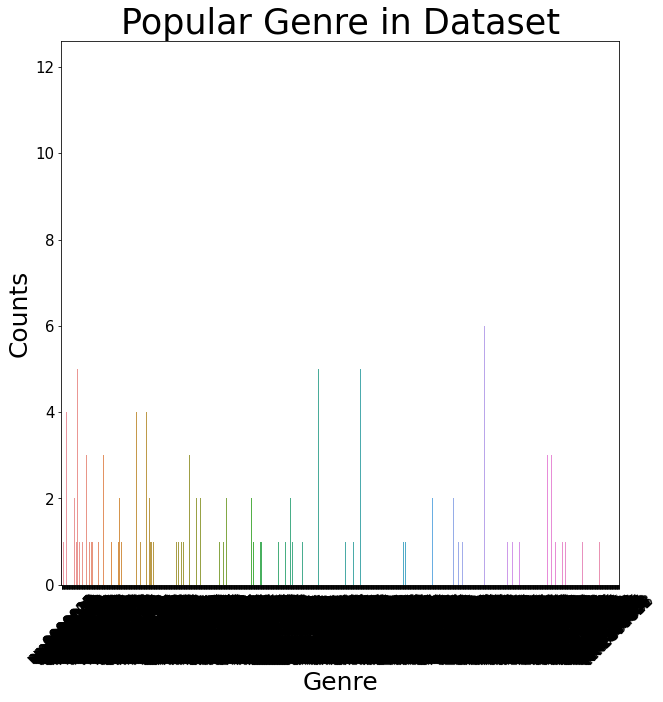

In [56]:
user_id = 138493

director_dict = {}
for i in director_df['director'].unique():
    director_dict[i] = 0

for i in main_df.loc[main_df['user'] == user_id]['item']:
    for j in director_df.loc[director_df['item'] == i]['director']:
        director_dict[j] += 1    

plt.rcParams['figure.figsize'] = [10,10]
sns.barplot(x = list(director_dict.keys()), y = list(director_dict.values()))
plt.title('Popular Genre in Dataset', fontsize=35)
plt.ylabel('Counts',fontsize=25)
plt.xlabel('Genre',fontsize=25)
plt.xticks(fontsize=15,rotation = 45)
plt.yticks(fontsize=15)
plt.show()

감독으로 뚜렸한 양항은 보기 어렵다